In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data = pd.read_csv('./Data/Data_processed/Processed_data.csv', sep=';', encoding='latin1')

In [3]:
# Splitting data into training and testing
X = data.drop(columns=['Pris'])
y = data['Pris']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [4]:
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_predLR = modelLR.predict(X_test)
print("Linear Regression MSE: ", mean_squared_error(y_test, y_predLR))
print("Linear Regression MAE: ", mean_absolute_error(y_test, y_predLR))
print("Linear Regression R2 score: ", r2_score(y_test, y_predLR))

Linear Regression MSE:  45733404.70768447
Linear Regression MAE:  4167.976469335605
Linear Regression R2 score:  0.5927425945260503


# Random Forest

In [10]:
modelRFR = RandomForestRegressor(random_state=42)
modelRFR.fit(X_train, y_train)
y_predRFR = modelRFR.predict(X_test)
print("Random Forest Regressor MSE: ", mean_squared_error(y_test, y_predRFR))
print("Random Forest Regressor MAE: ", mean_absolute_error(y_test, y_predRFR))
print("Random Forest Regressor R2 score: ", r2_score(y_test, y_predRFR))

Random Forest Regressor MSE:  6755659.350687169
Random Forest Regressor MAE:  753.490840228766
Random Forest Regressor R2 score:  0.9398406412771539


# SVR

In [6]:
modelSVR = SVR()
modelSVR.fit(X_train, y_train)
y_predSVR = modelSVR.predict(X_test)
print("SVR MSE: ", mean_squared_error(y_test, y_predSVR))
print("SVR MAE: ", mean_absolute_error(y_test, y_predSVR))
print("SVR R2 score: ", r2_score(y_test, y_predSVR))

SVR MSE:  117423975.564862
SVR MAE:  7007.014750894753
SVR R2 score:  -0.045664190861057774


As you can see the Random Forest Regressor has the best mean squared error, mean absoulute error and r2 score. A r2 score of 0.93 is very good and means that the model is going to be quite accurate in its predictions.
Om the other hand SVR model has a negative r2 score which means that it performs worse than if you just guessed the mean value.

# Quality assessment

# Prediction Error Plots

The plots below are prediction error plots. The red line is the ideal predictions and blue dots are the actual predictions.

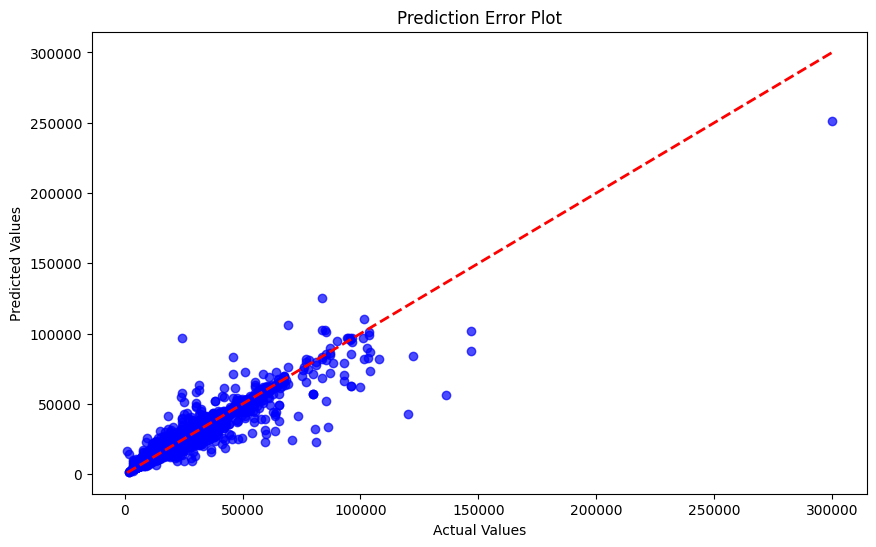

In [7]:
# Random Forest Error Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predRFR, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.show()

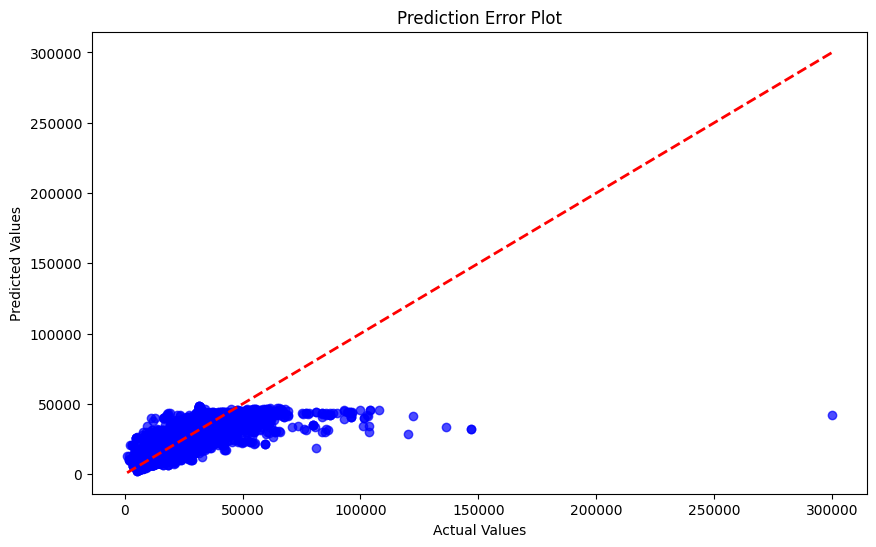

In [8]:
# Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predLR, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.show()

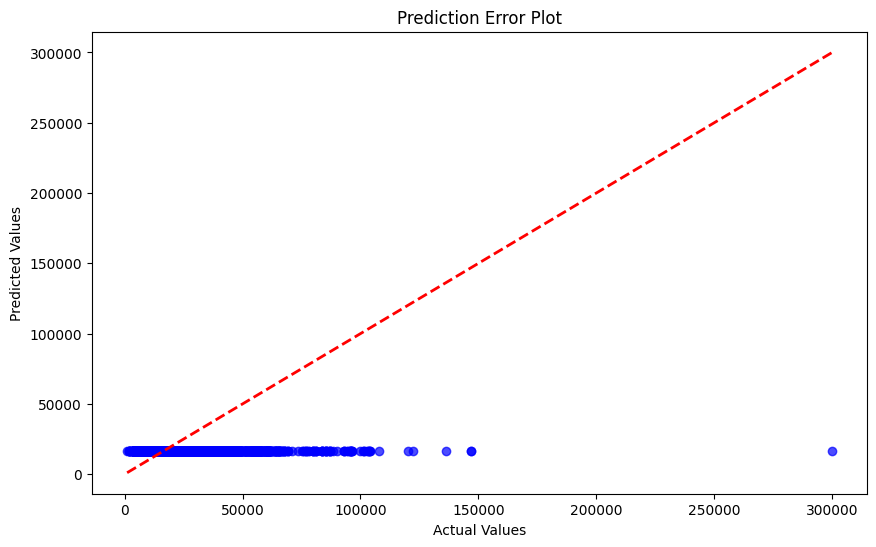

In [9]:
# SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predSVR, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.show()

# Residual Plots

The plots below are residual plots. This can be used to help identify outliers and heteroscedasticity. Heteroscedasticity is when the standard deviation of the predicted values are non-constant. Explanation: https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity

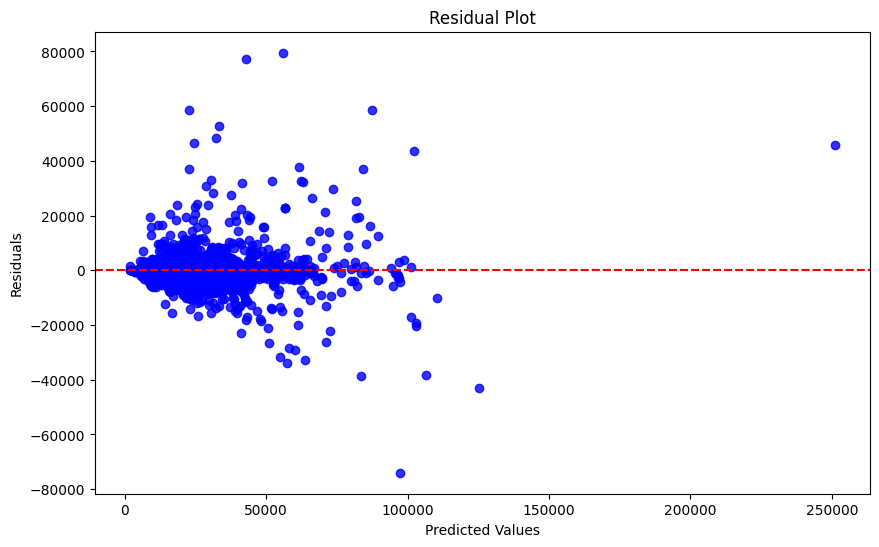

In [10]:
# Random Forest Regressor
residuals = y_test - y_predRFR
plt.figure(figsize=(10, 6))
sns.residplot(x=y_predRFR, y=residuals, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()

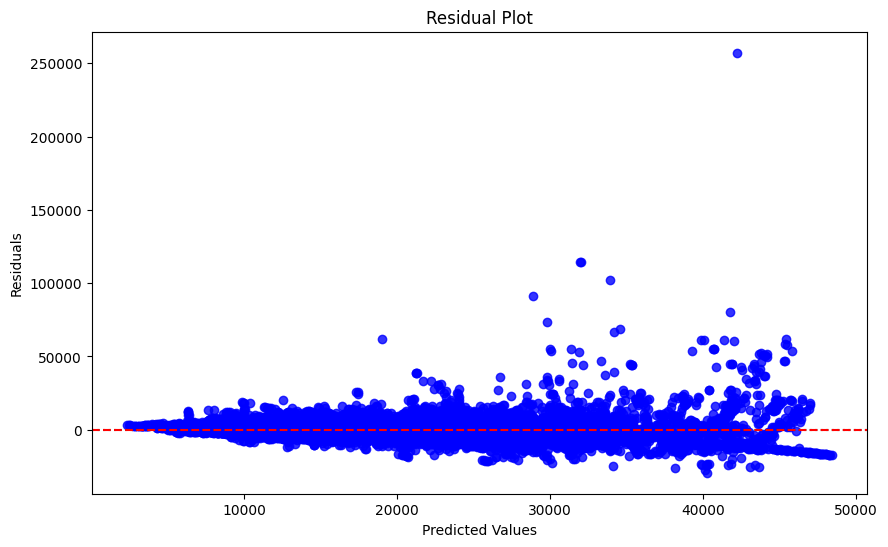

In [11]:
# Linear Regression
residuals = y_test - y_predLR
plt.figure(figsize=(10, 6))
sns.residplot(x=y_predLR, y=residuals, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()

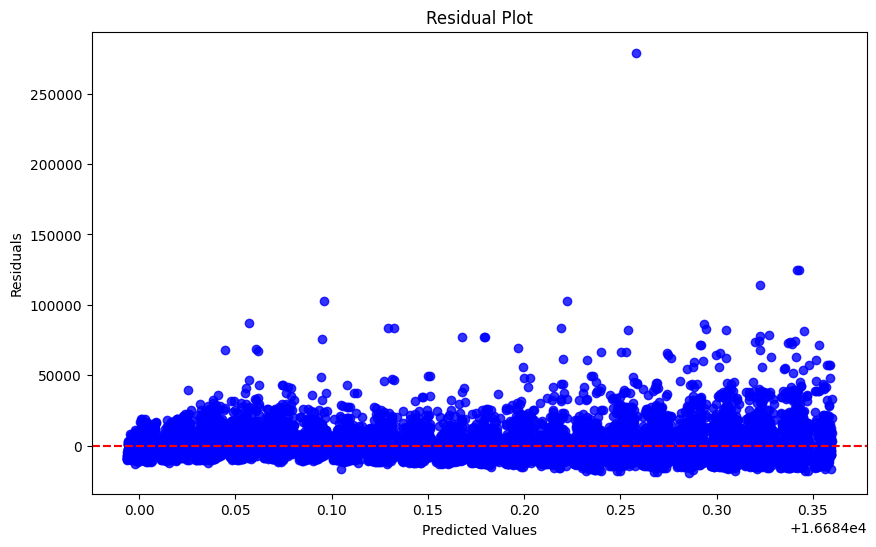

In [12]:
# SVR
residuals = y_test - y_predSVR
plt.figure(figsize=(10, 6))
sns.residplot(x=y_predSVR, y=residuals, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Exporting the model

In [11]:
import pickle

In [12]:
pickle.dump(modelRFR, open('./App/models/RandomForestModel.pkl', 'wb'))